План:
1. Что такое управление данными и предобработка. Почему это важно?
2. Место предобработки данных в общем процеесе
3. С какими видами данных работают ML и DL модели
4. Стадии предобработки данных и часто используемые инструменты
5. Примеры обработки различных типов данных
    - Числовые
    - Текстовые
    - Изображения
    - Звук
    - Временные ряды

# Управление данными и предобработка. Подготовка данных для ML.

Автор: Ширяева Диана, 6013

## Что такое управление данными и предобработка. Почему это важно?

<span style="color:#CC0099">**Управление данными**</span> – это процесс сбора, хранения, обработки, анализа и использования данных.

- **Сбор данных**: Определение источников, извлечение данных, обработка ошибок сбора данных, создание единого формата.
- **Хранение данных**: Выбор подходящей системы хранения (базы данных, облачные хранилища), обеспечение безопасности данных.
- **Предобработка данных**: Преобразование данных, агрегирование, фильтрация, создание новых признаков.
- **Анализ данных**: Использование статистических методов и визуализации для получения insights (ценности).
- **Использование данных**: Применение данных для принятия решений, разработки моделей машинного обучения и т.д.

<span style="color:#CC0099">**Предобработка данных**</span> – это этап, который подготавливает данные к обучению модели машинного обучения. Он включает в себя:
- Очистку данных: Удаление шума, выбросов, пропущенных значений, дубликатов.
- Преобразование данных: Масштабирование, кодирование категориальных признаков, приведение данных к нужному формату.
- Инженерия признаков: Создание новых признаков из существующих, отбор наиболее релевантных признаков.

<span style="color:#CC0099">**Почему это важно?**</span>

Качество данных влияет на:
1. Качество модели
2. Эффективность модели
3. Обобщающую способность модели

Также предобработка данных дает ещё один важный бонус - это <span style="color:#FFCC00">**понимание данных**</span>

## Место предобработки данных в общем процеесе

<pre>
┌───────────────────┐
│ Сбор данных       │
└───────────────────┘
          ↓
┌───────────────────┐
│ Предобработка     │
└───────────────────┘
          ↓
┌───────────────────┐
│ Построение модели │
└───────────────────┘
          ↓
┌───────────────────┐
│ Обучение медели   │
└───────────────────┘
          ↓
┌───────────────────┐
│ Предсказание      │
└───────────────────┘
          ↓
┌───────────────────┐
│ Анализ качества   │
└───────────────────┘
          ↓
┌───────────────────┐
│ Интерпретация     │
└───────────────────┘
</pre>

## С какими видами данных работают ML и DL модели

Желания человека: 
- Числовые
- Текстовые
- Изображения
- Аудио
- Временные ряды

Но сами модели работают с <span style="color:#FFCC00">количественными типами данных</span>, поэтому все качественные (категориальные) типы данных необходимо привести к формату, который понятен компьютеру.

## Стадии предобработки данных и часто используемые инструменты

1. Очистка данных:
    - Обработка пропущенных значений: Удаление, замена (средним, медианой, моделью), заполнение нулями.
    - Удаление дубликатов: Определение и удаление дублирующихся записей.
    - Обработка выбросов: Идентификация и коррекция аномальных значений.
2. Преобразование данных:
    - Масштабирование: Нормализация данных (приведение к диапазону 0-1) или стандартизация (приведение к нулевому среднему и единичному стандартному отклонению).
    - Кодирование категориальных признаков: Преобразование категориальных данных в числовые (например, с помощью one-hot encoding, label encoding).
    - Разбиение данных: Разделение на обучающую, проверочную и тестовую выборки.
3. Инженерия признаков:
    - Создание новых признаков: Извлечение информации из существующих признаков
    - Выбор признаков: Отбор наиболее релевантных признаков для модели.
    - Трансформация признаков: Приведение признаков к более удобному формату для модели (например, логарифмирование, применение полиномов).
4. Проверка качества данных:
    - Визуализация данных: Построение графиков для анализа распределения данных, наличия выбросов, зависимостей.
    - Статистический анализ: Вычисление основных статистических характеристик (среднее, дисперсия, корреляция), проверка гипотез.

<span style="color:#CC0099">Инструменты</span>:
- Python: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
- R: dplyr, tidyr, ggplot2
- SQL

### Очистка числовых данных

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

Датасет fetch_california_housing содержит информацию о жилье в Калифорнии

1. MedInc (Median Income) - Медианный доход населения в районе (в десятитысячах долларов). 
2. HouseAge (House Age) - Средний возраст домов в районе.
3. AveRooms (Average Number of Rooms) - Среднее количество комнат в доме в районе.
4. AveBedrms (Average Number of Bedrooms) - Среднее количество спален в доме в районе.
5. Population (Population) - Общая численность населения в районе.
6. AveOccup (Average Occupancy) - Средняя плотность населения в районе (количество людей на один дом).
7. Latitude (Latitude) - Широта района.
8. Longitude (Longitude) - Долгота района.
9. MedHouseVal (Median House Value) - Медианная стоимость жилья в районе (в десятитысячах долларов). (является target)

In [93]:
df = pd.read_csv("fetch_california_housing.csv")
del df["Unnamed: 0"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [94]:
# shape и types данных
print(df.shape)
print(df.dtypes)

(20641, 9)
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [95]:
# отбор числовых колонок, если датасет содержит не только числовые столбцы
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedHouseVal']
[]


#### Поиск пропущенных значений и способы умтранения

<Axes: >

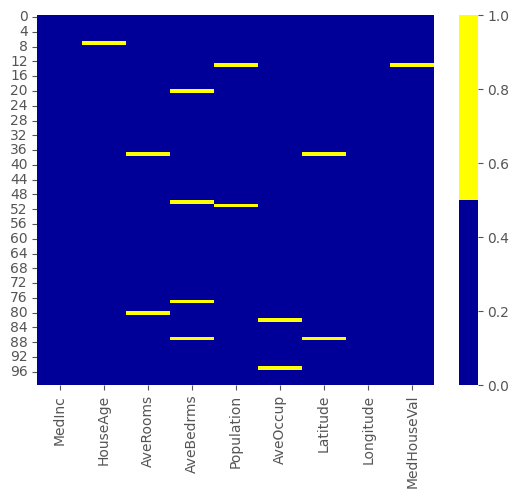

In [96]:
# тепловая карта пропущенных значений
cols = df.columns
colours = ['#000099', '#ffff00'] # желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(df[cols][:100].isnull(), cmap=sns.color_palette(colours))

In [97]:
# Процентный список пропущенных данных
def get_percentage_skips(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, pct_missing*100))

get_percentage_skips(df)

MedInc - 0.0%
HouseAge - 0.004844726515188218%
AveRooms - 0.009689453030376436%
AveBedrms - 0.019378906060752873%
Population - 0.009689453030376436%
AveOccup - 0.009689453030376436%
Latitude - 0.009689453030376436%
Longitude - 0.0%
MedHouseVal - 0.004844726515188218%


In [98]:
# методы борьбы с пропущенными значениями
# Отбрасывание записей - ! Это решение подходит только в том случае, если недостающие данные не являются информативными !
df_cleaned = df.dropna()
get_percentage_skips(df_cleaned)

MedInc - 0.0%
HouseAge - 0.0%
AveRooms - 0.0%
AveBedrms - 0.0%
Population - 0.0%
AveOccup - 0.0%
Latitude - 0.0%
Longitude - 0.0%
MedHouseVal - 0.0%


In [99]:
# Отбрасывание признаков - ! Применяется, только если признак не несет никакой пользы !
cols_to_drop = ['MedHouseVal']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)
df_less_hos_beds_raion

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [ ]:
# Внесение недостающих значений
# 1. Среднее значение: Используйте, если данные распределены нормально или близки к нормальному распределению.
df['MedInc'].fillna(df['MedInc'].mean(), inplace=True)
    
# 2. Медианное значение: Более устойчиво к выбросам, чем среднее значение.
df['HouseAge'].fillna(df['HouseAge'].median(), inplace=True)
    
# 3. Мода: Используйте для категориальных переменных или для числовых данных,  распределенных  не  нормально.
df['AveBedrms'].fillna(df['AveBedrms'].mode()[0], inplace=True)
    
# 4. Вперед-заполнение: Используйте для временных рядов или данных, где  последовательные  значения  зависят  друг  от  друга.
df['Population'].fillna(method='ffill', inplace=True)
    
# 5. Обратно-заполнение: Аналогично forward fill (4),  но  используется  для  заполнения  пропущенных  значений  в  конце  датафрейма.
df['AveOccup'].fillna(method='bfill', inplace=True)

# 6. Замена недостающих значений на свои
    # категориальные признаки
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

    # численные признаки
df['Latitude'] = df['Latitude'].fillna(-999)

# 7. Методы машинного обучения: обучаем модель (например,  линейную  регрессию,  k-ближайших  соседей)  на  доступных  данных  
# и  используем  ее  для  предсказания  пропущенных  значений. Этот  метод  может  быть  более  точен,  чем  простые  методы  заполнения,  
# но  требует  более  сложного  кода  и  больше  времени  на  обучение.

#### Выбросы

<Axes: >

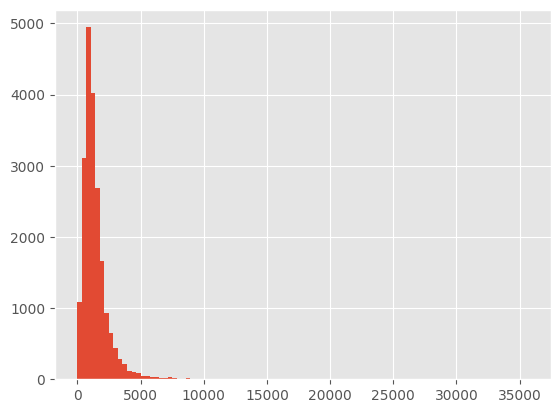

In [100]:
# Гистограмма/коробчатая диаграмма
df['Population'].hist(bins=100)

<Axes: >

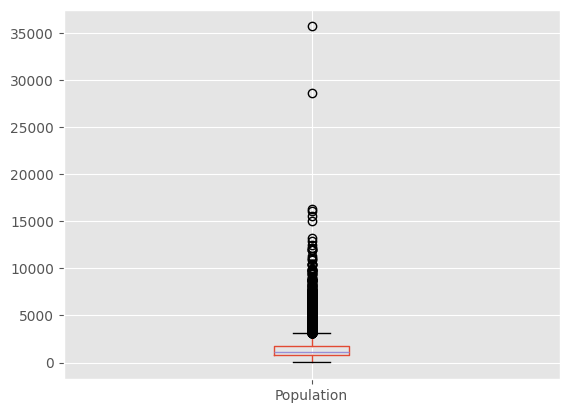

In [101]:
df.boxplot(column=['Population'])

<Axes: >

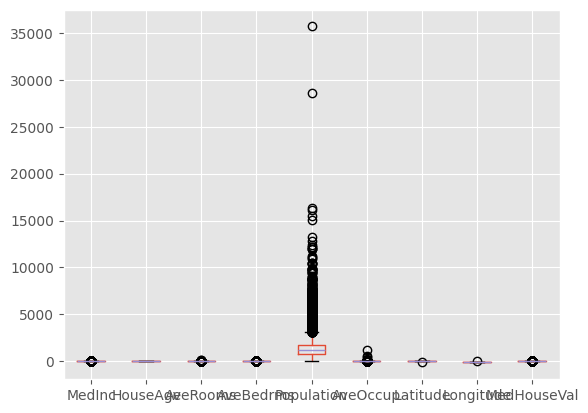

In [102]:
df.boxplot(column=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'])

In [103]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20641.000000,20640.000000,20639.000000,20637.000000,20639.000000,20639.000000,20639.000000,20641.000000,20640.000000
mean,3.870599,28.637742,5.429181,1.096679,1425.544891,3.072484,35.624073,-119.563770,2.068509
std,1.899804,12.584815,2.474157,0.473945,1132.461771,10.389111,2.402163,2.174561,1.153985
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,-122.260000,-124.350000,0.149990
25%,2.562500,18.000000,4.440951,1.006061,787.000000,2.430150,33.930000,-121.800000,1.196000
50%,3.534700,29.000000,5.229213,1.048780,1166.000000,2.818408,34.260000,-118.490000,1.797000
75%,4.743100,37.000000,6.052381,1.099526,1725.000000,3.282276,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,1.913000,5.000010


Для обнаружения выбросов можно использовать другие методы, например, построение точечной диаграммы, z-оценку или кластеризацию.

In [104]:
# Обнаружение неинформативных признаков
# Если признак имеет слишком много строк с одинаковыми значениями, он не несет полезной информации для проекта
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Нерелевантные признаки

Нерелевантные признаки обнаруживаются ручным отбором и оценкой значимости. Например, на жилье в Калифорнии не влияет количество людей в Токио

In [109]:
# Дубликаты записей
# отбрасываем неуникальные строки
df_dedupped = df.drop_duplicates()

# сравниваем формы старого и нового наборов
print(df.shape)
print(df_dedupped.shape)

# Другой распространенный способ вычисления дубликатов: по набору ключевых признаков. 
# Например, неуникальными можно считать записи с одной и той же долготой, широтой и средним количеством комнат и спален.

(20641, 9)
(20640, 9)


### Список литературы

- Взгляд машинного обучения на типы данных: https://skine.ru/articles/538818/
- Предварительная обработка данных для машинного обучения / Хабр: https://habr.com/ru/articles/800973/